In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [27]:
# Parameters

V_m = 80
L = 11
rho_m = 250
nx = 51
dt = 0.001

#t_f = 3

#nt = int((t_f/60)/dt)

#print(nt)

x = np.linspace(0, L, nx)
dx = x[1]-x[0]
print(dx)

# Initial Conditions

rho0 = np.ones(nx)*10
rho0[10:20] = 50

# Boundary Conditions

r0 = 10

#print(rho0)

0.22


In [28]:
def F(rho, rho_max, Vmax):
    
    F = Vmax*rho*(1-(rho/rho_max))
    
    return F

In [29]:
def traffic_flux(x,nx,dx,dt,r,rho_max,r0,V_max,nt):
    
    #nt = int((t_f/60)/dt) + 1
    v = np.zeros(nx)
    vn = np.zeros(nx)
    rn = np.ones(nx)
   
    for i in range(nt):
        rn = r.copy()
        for j in range(1,nx):
            r[j] = rn[j] - dt/dx*(F(rn[j],rho_max,V_max) - F(rn[j-1],rho_max,V_max))
            r[0]=r0
        for j in range(nx):
            v[j]=F(r[j],rho_max,V_max)/r[j]
        for j in range(nx):
            vn[j]=F(rn[j],rho_max,V_max)/rn[j]
        
    plt.figure
    plt.plot(x,v)
    plt.show()
    
    return r,v,rn,vn

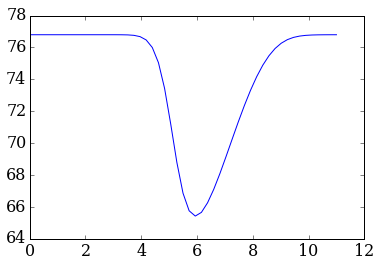

In [30]:
rho, v, rn, vn = traffic_flux(x,nx,dx,dt,rho0,rho_m,r0,V_m,50)

In [31]:
print(min(v)*1000/3600)

18.1739519268


In [32]:
print(sum(v)/nx * 5/18)

20.6361661961


In [33]:
#plt.plot(x,v)